<a href="https://colab.research.google.com/github/dhirajshrotri/Jupyter-notebooks/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 - Convolutional Neural Network (CNN)
In this assignment you will practice how to create Convolutional Neural Networks (CNNs) in PyTorch. First, you will construct CNN by follow the specific requirements and architectures. Then, you will construct you own CNN to achieve a certain accuracy on testing data. Both CNNs will be trained on CIFAR-10 dataset.

In [1]:
# Imports for PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import torchvision.transforms as transforms
# Imports for other uses
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing

## TODO: Data selection and Variables (5 points)
There is one task in this section
1. Please input your SUID number in the variable 'SUID'. This will be used as a unique random variable seed for your assignment.

You can also use this section to select the number of epochs and the batch size for your model.

In [2]:
# Start TODO
SUID = 481764787

epochs = 2
batch_size = 8
# End TODO

## Importing Training and Test Datasets

In [3]:
torch.manual_seed(SUID)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


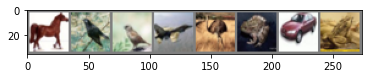

horse  bird  bird plane  bird  frog   car  frog


In [4]:
# This function will allow for the visualization of some of the entries
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Select the first batch of images (since they are randomized we should see a good selection)
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show the images
imshow(torchvision.utils.make_grid(images))
# Print the true labels of the images
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

# Defining a Convolutional Neural Network

## TODO: Create CNN model (20 points)
Fill codes between TO DO block to construct the model by follow these requirements and architecture:
- 2D Convolutional Layer with 32 filters of size 5x5 and a stride 1
- Relu activation
- 2D Convolutional Layer with 64 filters of size 5x5 and a stride 1
- Relu activation
- 2x2 Max Pooling with stride 2
- Fully connected with 1024 hidden neurons
- Relu activation
- Fully connected that map to 10 output classes
- Softmax

You can learn more about the different types of layers in PyTorch:
- 2D Convolutional Layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
- Max Pooling Layer - https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
- Fully Connected Layer - https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

And the functions:
- ReLu - https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html
- Softmax - https://pytorch.org/docs/master/generated/torch.nn.functional.log_softmax.html

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # TODO
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d((2, 2), stride=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        # END TODO

    def forward(self, x):
        # TODO
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # END TODO
        return x

net = Net()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## TODO: Optimizer and Criterion (5 points)
In this section you will define your loss function and how you will update your weights.
1. For the criterion use Cross Entropy Loss
2. For the optimizer use stochastic gradient descent. Select a learning rate and momentum such that the loss of your model converges.

In [6]:
import torch.optim as optim
#TODO
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#ENDTODO

## TODO: Learning (10 points)
In this section you will start learning your embedding. The steps to do so will be
1. Zero the parameter gradients
2. Do a forward pass to generate and output
3. Calculate the loss based on that output
4. Backpropagate the loss
5. Update your weights.

NOTE: Some students recognized an issue with the ".to(device)" not working properly with their GPU notebooks. A work around is to replace this with ".cuda()". This is an acceptable change outside of the TODOs if it works for you.

In [7]:
print('Start Training')

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # Seperate the inputs and labels from the loader, and send them to the device (data is a list of [inputs, labels])
        inputs, labels = data[0].to(device), data[1].to(device)

        # TODO
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        
        # Calculate loss (name your variable 'loss')
        loss = criterion(outputs, labels)
        
        # Propagate loss
        loss.backward()
        
        # Update Weights
        optimizer.step()

        # END TODO
        
        # Print The running loss
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Start Training
[1,  2000] loss: 2.175
[1,  4000] loss: 1.863
[1,  6000] loss: 1.640
[2,  2000] loss: 1.510
[2,  4000] loss: 1.427
[2,  6000] loss: 1.372
Finished Training


# Testing

## Sample Test

This section will do a quick test of your network. By showing the outputs, you should be able to qualitatively get a feeling for how well your network works. First we will print some of the images with the ground truth label, then we'll run that batch through your network to see what your network outputs. Likely there will be some errors.

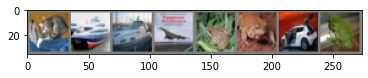

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog


In [8]:
# Images and Ground Truth
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [9]:
# Network Outputs
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(batch_size)))

RuntimeError: ignored

## Full Testing

Now that we've qualitatively seen the ability of our network to learn, we will now find a quantitative measure using the test set. First we will find the overall accuracy, and then the accuracy on each individual class.

In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
#         images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [11]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
#         images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 51 %
Accuracy of   car : 78 %
Accuracy of  bird : 29 %
Accuracy of   cat : 32 %
Accuracy of  deer : 49 %
Accuracy of   dog : 46 %
Accuracy of  frog : 60 %
Accuracy of horse : 63 %
Accuracy of  ship : 59 %
Accuracy of truck : 62 %


# Design Your Own CNN

## TODO: Net2 - Build your own model (20 points)
Construct the model in TO DO block to get a test accuracy of greater than ~70%. You can use any available techniques. If you want to use any type of layer or function outside of those used above, please note why you are using that layer or function in your report.

In [21]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 2 * 2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.dropout1 = nn.Dropout(p=0.125, inplace=False)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout1(x)
        x = x.view(-1, 128 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

net = Net2()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

Net2(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
  (dropout1): Dropout(p=0.125, inplace=False)
)

## TODO: Optimizer and Criterion 2 (5 points)
In this section you will define your loss function and how you will update your weights.
1. For the criterion you many use any criterion you wish. For consistency, please name it 'criterion'
2. For the optimizer use stochastic gradient descent. Select a learning rate and momentum such that the loss of your model converges.

You may also set a different number of epochs for this part.

In [22]:
import torch.optim as optim

#TODO
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)
# END TODO

## TODO: Learning 2 (10 points)
In this section you will start learning your embedding. The steps to do so will be
1. Zero the parameter gradients
2. Do a forward pass to generate and output
3. Calculate the loss based on that output
4. Backpropagate the loss
5. Update your weights.

NOTE: Some students recognized an issue with the ".to(device)" not working properly with their GPU notebooks. A work around is to replace this with ".cuda()". This is an acceptable change outside of the TODOs if it works for you.

In [23]:
print('Start Training')

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # TODO
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        
        # Calculate loss (name your variable 'loss')
        loss = criterion(outputs, labels)
        
        # Propagate loss
        loss.backward()
        
        # Update Weights
        optimizer.step()

        # END TODO

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Start Training
[1,  2000] loss: 2.304
[1,  4000] loss: 2.301
[1,  6000] loss: 2.261
[2,  2000] loss: 2.001
[2,  4000] loss: 1.826
[2,  6000] loss: 1.697
[3,  2000] loss: 1.557
[3,  4000] loss: 1.465
[3,  6000] loss: 1.400
[4,  2000] loss: 1.299
[4,  4000] loss: 1.248
[4,  6000] loss: 1.198
[5,  2000] loss: 1.133
[5,  4000] loss: 1.109
[5,  6000] loss: 1.086
[6,  2000] loss: 1.012
[6,  4000] loss: 1.001
[6,  6000] loss: 0.992
[7,  2000] loss: 0.924
[7,  4000] loss: 0.932
[7,  6000] loss: 0.903
[8,  2000] loss: 0.843
[8,  4000] loss: 0.855
[8,  6000] loss: 0.852
[9,  2000] loss: 0.800
[9,  4000] loss: 0.793
[9,  6000] loss: 0.803
[10,  2000] loss: 0.739
[10,  4000] loss: 0.766
[10,  6000] loss: 0.754
Finished Training


## Testing
For your unique CNN, we are only interested in the overall accuracy for comparison to the target accuracy, but the per class accuracy is also included for your report.

In [24]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
#         images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 71 %


In [25]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
#         images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 78 %
Accuracy of  bird : 55 %
Accuracy of   cat : 54 %
Accuracy of  deer : 70 %
Accuracy of   dog : 54 %
Accuracy of  frog : 85 %
Accuracy of horse : 70 %
Accuracy of  ship : 85 %
Accuracy of truck : 85 %
